# Incidence of chickenpox illness in France

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import os.path

We check if the file is already downloaded and store to a local file to prevent to download every time we run the program. If it is not, we use the link and download it and save it locally.

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"
file = "incidence-PAY-7.csv"
import urllib.request
if not os.path.exists(file):
    urllib.request.urlretrieve(data_url, file)
raw_data = pd.read_csv(file, skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202042          7   2993     1283    4703       5           2   
1     202041          7   3974     2106    5842       6           3   
2     202040          7   2078      675    3481       3           1   
3     202039          7   1049      237    1861       2           1   
4     202038          7   2253      782    3724       3           1   
5     202037          7   1584      405    2763       2           0   
6     202036          7    919      100    1738       1           0   
7     202035          7    828        0    1694       1           0   
8     202034          7   2272      371    4173       3           0   
9     202033          7   1284      177    2391       2           0   
10    202032          7   2650      689    4611       4           1   
11    202031          7   1303      100    2506       2           0   
12    202030          7   1385       75    2695       2           0   
13    202029          7    841       10    1672       1           0   
14    202028          7    728        0    1515       1           0   
15    202027          7    986      149    1823       1           0   
16    202026          7    694        0    1454       1           0   
17    202025          7    228        0     597       0           0   
18    202024          7    388        0     959       1           0   
19    202023          7    558        1    1115       1           0   
20    202022          7    277        0     633       0           0   
21    202021          7    602       36    1168       1           0   
22    202020          7    824       20    1628       1           0   
23    202019          7    310        0     753       0           0   
24    202018          7    849       98    1600       1           0   
25    202017          7    272        0     658       0           0   
26    202016          7    758       78    1438       1           0   
27    202015          7   1918      675    3161       3           1   
28    202014          7   3879     2227    5531       6           3   
29    202013          7   7326     5236    9416      11           8   
...      ...        ...    ...      ...     ...     ...         ...   
1529  199126          7  17608    11304   23912      31          20   
1530  199125          7  16169    10700   21638      28          18   
1531  199124          7  16171    10071   22271      28          17   
1532  199123          7  11947     7671   16223      21          13   
1533  199122          7  15452     9953   20951      27          17   
1534  199121          7  14903     8975   20831      26          16   
1535  199120          7  19053    12742   25364      34          23   
1536  199119          7  16739    11246   22232      29          19   
1537  199118          7  21385    13882   28888      38          25   
1538  199117          7  13462     8877   18047      24          16   
1539  199116          7  14857    10068   19646      26          18   
1540  199115          7  13975     9781   18169      25          18   
1541  199114          7  12265     7684   16846      22          14   
1542  199113          7   9567     6041   13093      17          11   
1543  199112          7  10864     7331   14397      19          13   
1544  199111          7  15574    11184   19964      27          19   
1545  199110          7  16643    11372   21914      29          20   
1546  199109          7  13741     8780   18702      24          15   
1547  199108          7  13289     8813   17765      23          15   
1548  199107          7  12337     8077   16597      22          15   
1549  199106          7  10877     7013   14741      19          12   
1550  199105          7  10442     6544   14340      18          11   
1551  199104          7   7913     4563   11263      14           8   
1552  199103          7  15387    10484   20290      27          18   
1553  199102          7  16277  

Are there missing data points?

In [3]:
raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In this case we are not missing anything. But in case we are we should remove this.

In [4]:
data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202042          7   2993     1283    4703       5           2   
1     202041          7   3974     2106    5842       6           3   
2     202040          7   2078      675    3481       3           1   
3     202039          7   1049      237    1861       2           1   
4     202038          7   2253      782    3724       3           1   
5     202037          7   1584      405    2763       2           0   
6     202036          7    919      100    1738       1           0   
7     202035          7    828        0    1694       1           0   
8     202034          7   2272      371    4173       3           0   
9     202033          7   1284      177    2391       2           0   
10    202032          7   2650      689    4611       4           1   
11    202031          7   1303      100    2506       2           0   
12    202030          7   1385       75    2695       2           0   
13    202029          7    841       10    1672       1           0   
14    202028          7    728        0    1515       1           0   
15    202027          7    986      149    1823       1           0   
16    202026          7    694        0    1454       1           0   
17    202025          7    228        0     597       0           0   
18    202024          7    388        0     959       1           0   
19    202023          7    558        1    1115       1           0   
20    202022          7    277        0     633       0           0   
21    202021          7    602       36    1168       1           0   
22    202020          7    824       20    1628       1           0   
23    202019          7    310        0     753       0           0   
24    202018          7    849       98    1600       1           0   
25    202017          7    272        0     658       0           0   
26    202016          7    758       78    1438       1           0   
27    202015          7   1918      675    3161       3           1   
28    202014          7   3879     2227    5531       6           3   
29    202013          7   7326     5236    9416      11           8   
...      ...        ...    ...      ...     ...     ...         ...   
1529  199126          7  17608    11304   23912      31          20   
1530  199125          7  16169    10700   21638      28          18   
1531  199124          7  16171    10071   22271      28          17   
1532  199123          7  11947     7671   16223      21          13   
1533  199122          7  15452     9953   20951      27          17   
1534  199121          7  14903     8975   20831      26          16   
1535  199120          7  19053    12742   25364      34          23   
1536  199119          7  16739    11246   22232      29          19   
1537  199118          7  21385    13882   28888      38          25   
1538  199117          7  13462     8877   18047      24          16   
1539  199116          7  14857    10068   19646      26          18   
1540  199115          7  13975     9781   18169      25          18   
1541  199114          7  12265     7684   16846      22          14   
1542  199113          7   9567     6041   13093      17          11   
1543  199112          7  10864     7331   14397      19          13   
1544  199111          7  15574    11184   19964      27          19   
1545  199110          7  16643    11372   21914      29          20   
1546  199109          7  13741     8780   18702      24          15   
1547  199108          7  13289     8813   17765      23          15   
1548  199107          7  12337     8077   16597      22          15   
1549  199106          7  10877     7013   14741      19          12   
1550  199105          7  10442     6544   14340      18          11   
1551  199104          7   7913     4563   11263      14           8   
1552  199103          7  15387    10484   20290      27          18   
1553  199102          7  16277  

Our dataset uses an uncommon encoding; the week number is attached to the year number, leaving the impression of a six-digit integer. That is how Pandas interprets it.

A second problem is that Pandas does not know about week numbers. It needs to be given the dates of the beginning and end of the week. We use the library isoweek for that.

Since the conversion is a bit lengthy, we write a small Python function for doing it. Then we apply it to all points in our dataset. The results go into a new column 'period'.

In [5]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

There are two more small changes to make.

First, we define the observation periods as the new index of our dataset. That turns it into a time series, which will be convenient later on.

Second, we sort the points chronologically.

In [6]:
sorted_data = data.set_index('period').sort_index()

We check the consistency of the data. Between the end of a period and the beginning of the next one, the difference should be zero, or very small. We tolerate an error of one second.

All is OK in our case.

In [7]:
periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

Now lets look at the data

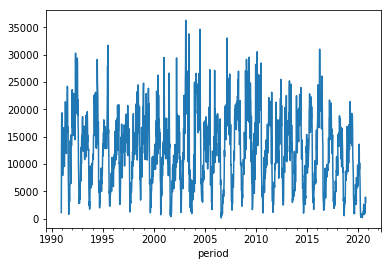

In [8]:
sorted_data['inc'].plot()

## Study of the annual incidence

Since we want to know the years in which the annual epidemy was strongest and weakest we need to choose September 1st as the beginning of each annual period.

we define the reference period for the annual incidence from September 1st of year $N$ to September 1st of year $N+1$. 
Our task is a bit complicated by the fact that a year does not have an integer number of weeks. Therefore we modify our reference period a bit: instead of September 1st, we use the first day of the week containing September 1st.

A final detail: the dataset starts in December 1990, the first year is thus incomplete, We start the analysis with the first full peak.

In [10]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W')
                     for y in range(1991,
                                    sorted_data.index[-1].year)]

Starting from this list of weeks that contain September 1st, we obtain intervals of approximately one year as the periods between two adjacent weeks in this list. We compute the sums of weekly incidences for all these periods.

We also check that our periods contain between 51 and 52 weeks, as a safeguard against potential mistakes in our code.

In [11]:
year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],
                        first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

And here are the annual incidences.

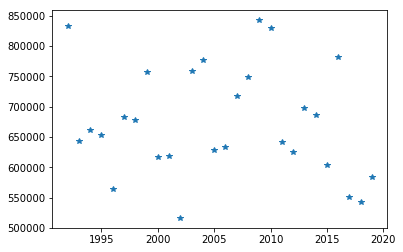

In [12]:
yearly_incidence.plot(style='*')

A sorted list makes it easier to find the highest values (at the end).

In [13]:
yearly_incidence.sort_values()

2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64

Finally, a histogram clearly shows the epidemic ocurences.

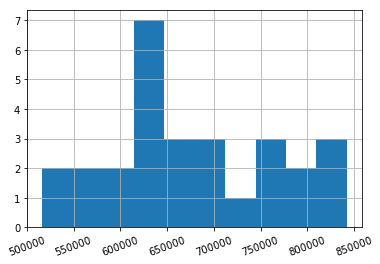

In [14]:
yearly_incidence.hist(xrot=20)